# L03.0 Object-oriented plotting using Matplotlib


Matplotlib is arguably the most popular Python package for both basic and advanced plotting. Let's look at a basic plot.


## Basic plot

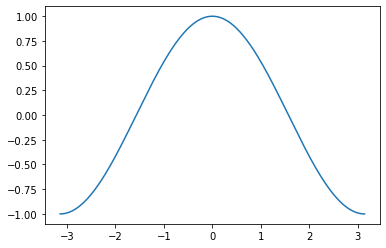

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 256)
y = np.cos(x)

plt.plot(x, y)
plt.show()

This looks pretty neat already. All information is clearly visible. However, we can add a few tweaks to make it more visually appealing. Let's use the golden ratio (1.618) as the figure's aspect ratio and up its resolution to 600 dpi. We of course also need to annotate the axes with labels.

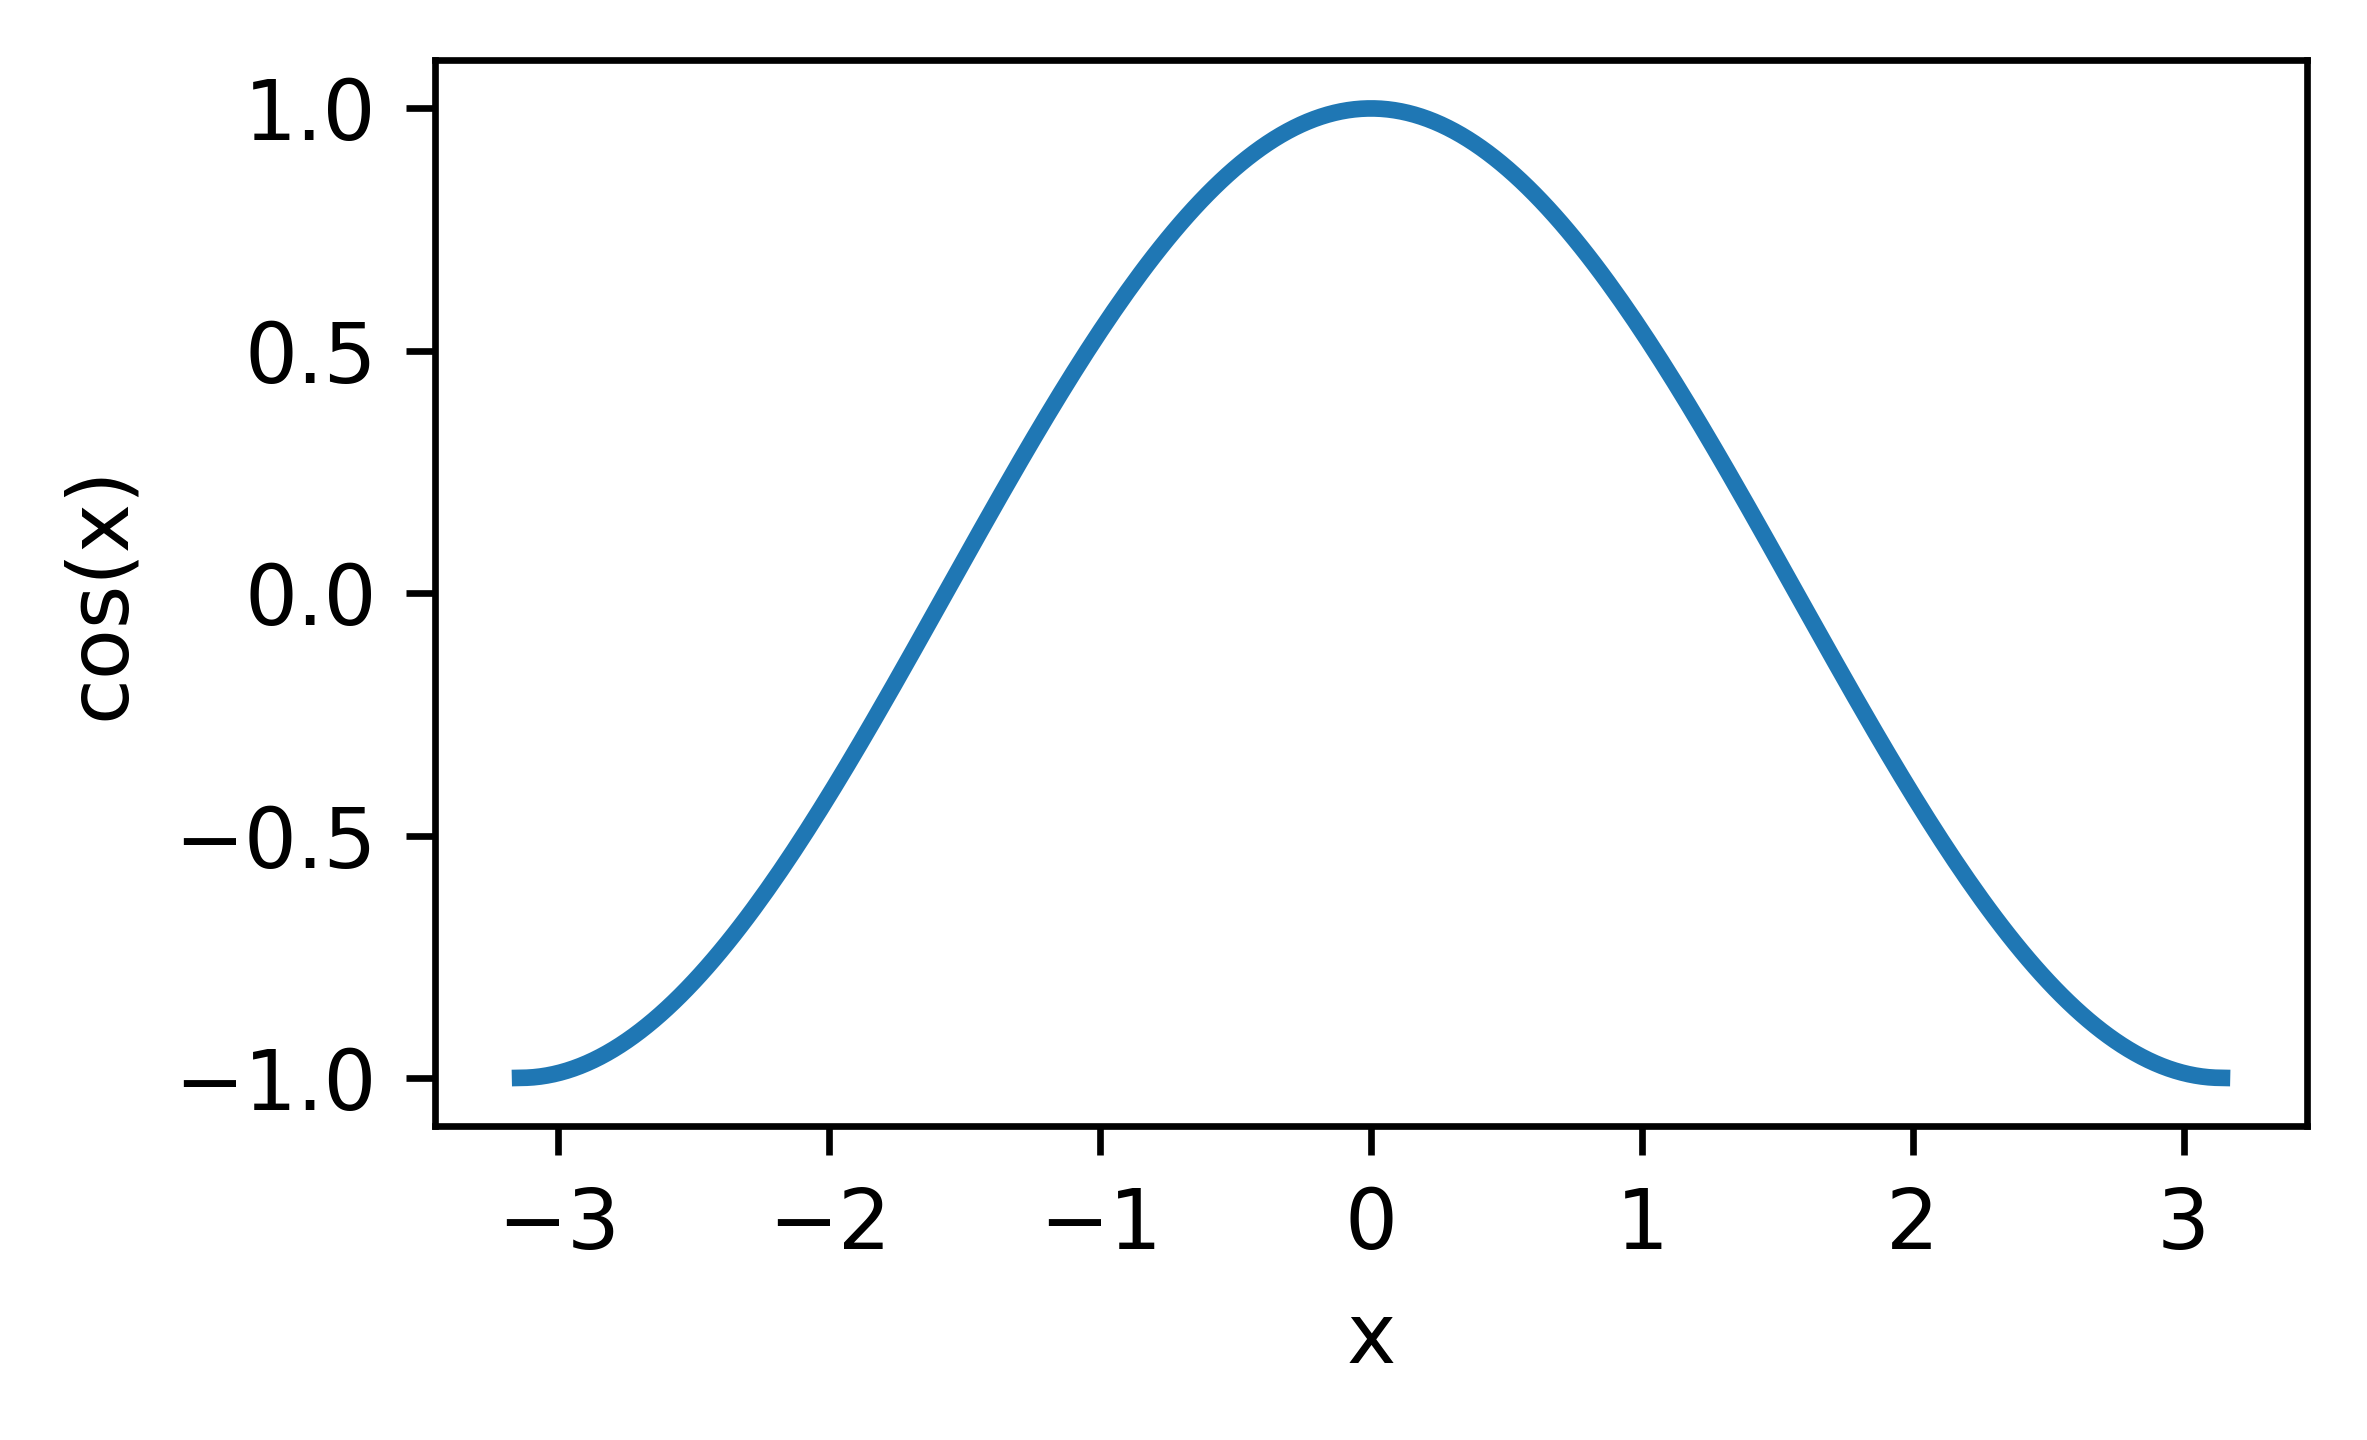

In [5]:
golden = 1.618
h = 2.5; w = h*golden 
fig = plt.figure(figsize=(w,h), dpi=600)

plt.plot(x, y, lw=2)
plt.xlabel("x")
plt.ylabel("cos(x)")

fig.tight_layout()
plt.show()

## Object-oriented plotting

Matplotlib is designed to give the user full control over their plots. Previously we used global references to plt and figure instances to create the plot. Now, we store the figure instances and their components that we create in order to manipulate them individually.

Text(0.5, 1.0, 'Cosine')

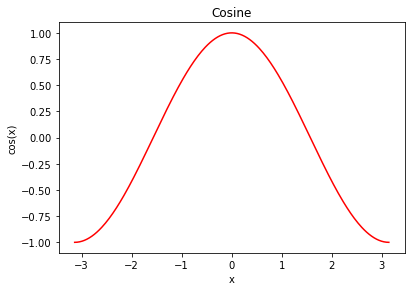

In [14]:
fig = plt.figure()

# specify figure axes: left, bottom, width, height
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('cos(x)')
axes.set_title('Cosine')

This allows us to easily add another axes object

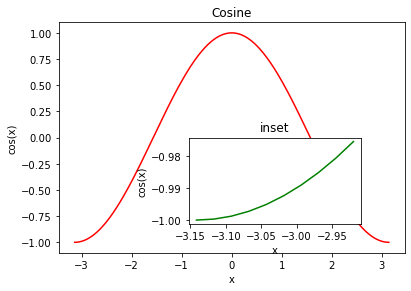

In [22]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.4, 0.2, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('cos(x)')
axes1.set_title('Cosine')

# inset
axes2.plot(x[0:10], y[0:10], 'g')
axes2.set_xlabel('x')
axes2.set_ylabel('cos(x)')
axes2.set_title('inset');

This can be handy, but most of the time figures will be displayed next to and/or below one another. For this, Matplotlib provides axis layout managers

Text(0.5, 1.0, 'Cosine')

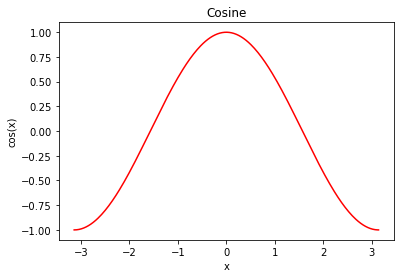

In [23]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('cos(x)')
axes.set_title('Cosine')

### Subplots

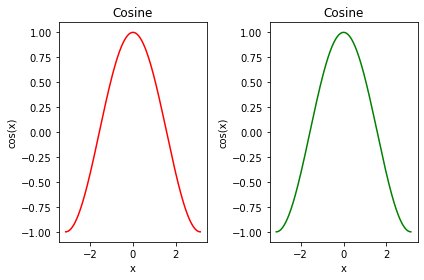

In [25]:
# create a plot with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(x, y, 'r')
axes[0].set_xlabel('x')
axes[0].set_ylabel('cos(x)')
axes[0].set_title('Cosine')

axes[1].plot(x, y, 'g')
axes[1].set_xlabel('x')
axes[1].set_ylabel('cos(x)')
axes[1].set_title('Cosine')

fig.tight_layout()

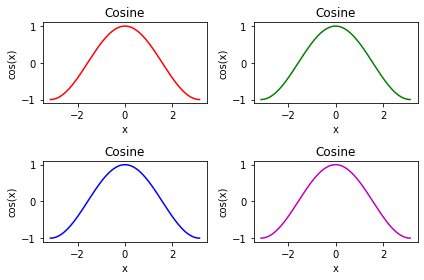

In [28]:
# create a plot with one row and two columns
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0,0].plot(x, y, 'r')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('cos(x)')
axes[0,0].set_title('Cosine')

axes[0,1].plot(x, y, 'g')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('cos(x)')
axes[0,1].set_title('Cosine')

axes[1,0].plot(x, y, 'b')
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('cos(x)')
axes[1,0].set_title('Cosine')

axes[1,1].plot(x, y, 'm')
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('cos(x)')
axes[1,1].set_title('Cosine')

fig.tight_layout()

The layout manager also allows us to change the figure size, aspect ratio, and DPI

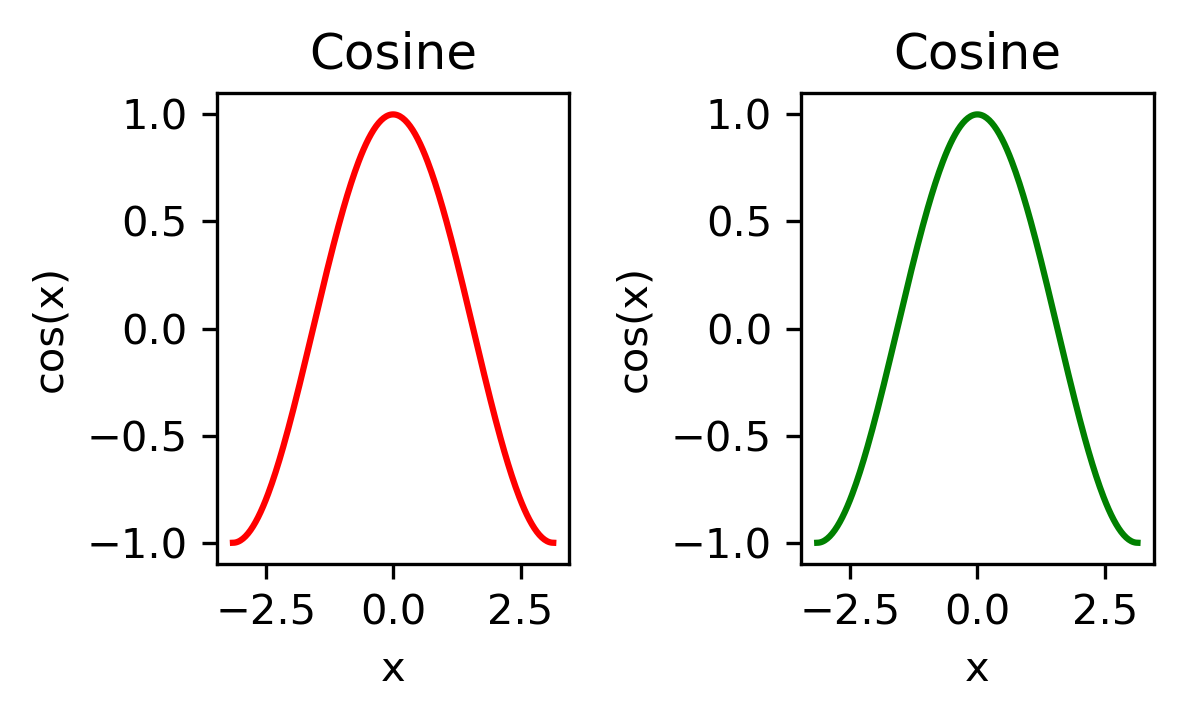

In [30]:
golden = 1.618
h = 2.5; w = h*golden 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(w,h), dpi=300)

axes[0].plot(x, y, 'r')
axes[0].set_xlabel('x')
axes[0].set_ylabel('cos(x)')
axes[0].set_title('Cosine')

axes[1].plot(x, y, 'g')
axes[1].set_xlabel('x')
axes[1].set_ylabel('cos(x)')
axes[1].set_title('Cosine')

fig.tight_layout()

Save the figure using

In [33]:
fig.savefig("matplotlib.png", dpi=100)

### Figure legends

Let's plot both cosine and sine in the same figure.

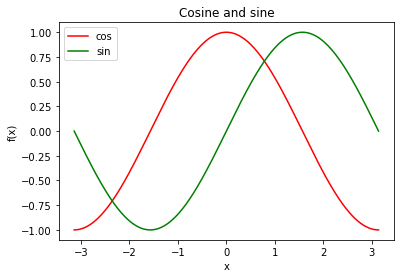

In [38]:
x = np.linspace(-np.pi, np.pi, 256)
y1 = np.cos(x)
y2 = np.sin(x)

fig, axes = plt.subplots()

axes.plot(x, y1, 'r', label="cos")
axes.plot(x, y2, 'g', label="sin")
axes.set_xlabel('x')
axes.set_ylabel('f(x)')
axes.set_title('Cosine and sine')
axes.legend(loc=0) # find optimal location
# axes.legend(loc=1) # upper right
# axes.legend(loc=2) # upper left
# axes.legend(loc=3) # lower left
# axes.legend(loc=4) # lower right

### LaTeX rendering

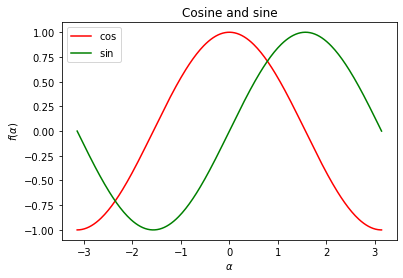

In [42]:
fig, axes = plt.subplots()

axes.plot(x, y1, 'r', label=r"$\cos$")
axes.plot(x, y2, 'g', label=r"$\sin$")
axes.set_xlabel(r"$\alpha$")
axes.set_ylabel(r"$f(\alpha)$")
axes.set_title('Cosine and sine')
axes.legend(loc=0)

### Line and marker styles

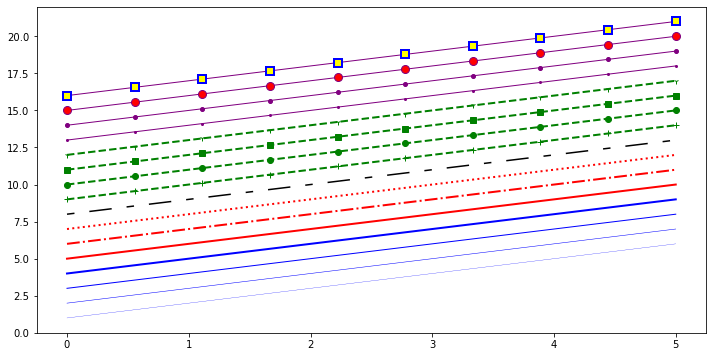

In [48]:
x = np.linspace(0, 5, 10)

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Custom axes

We can set the axis limits:

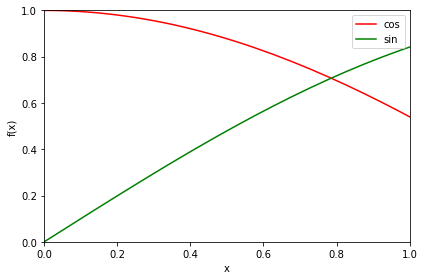

In [77]:
x = np.linspace(-np.pi, np.pi, 256)
y1 = np.cos(x)
y2 = np.sin(x)

fig, axes = plt.subplots()

axes.plot(x, y1, 'r', label="cos")
axes.plot(x, y2, 'g', label="sin")
axes.set_xlabel('x')
axes.set_ylabel('f(x)')
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])
axes.legend(loc=0)

fig.tight_layout()

To add a grid use:

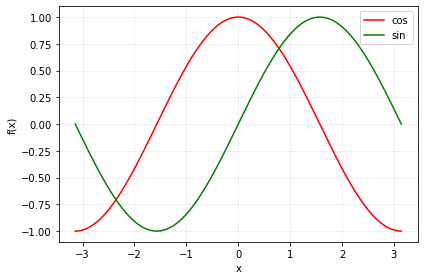

In [79]:
fig, axes = plt.subplots()

axes.plot(x, y1, 'r', label="cos")
axes.plot(x, y2, 'g', label="sin")
axes.set_xlabel('x')
axes.set_ylabel('f(x)')
axes.grid(alpha=0.5, linestyle='dashed', linewidth=0.5)
axes.legend(loc=0)

fig.tight_layout()

In some situations we need dual axes in a figure - typically on the y-axis

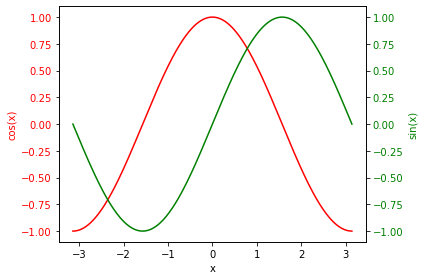

In [82]:
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('cos(x)', color='r')
for label in ax1.get_yticklabels():
    label.set_color('r')

ax2 = ax1.twinx() 
ax2.plot(x, y2, 'g')
ax2.set_xlabel('x')
ax2.set_ylabel('sin(x)', color='g')
for label in ax2.get_yticklabels():
    label.set_color('g')

fig.tight_layout()

### Customize tick labels

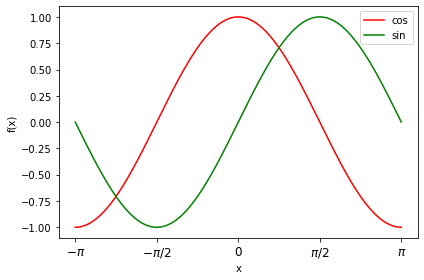

In [74]:
x = np.linspace(-np.pi, np.pi, 256)
y1 = np.cos(x)
y2 = np.sin(x)

fig, axes = plt.subplots()

axes.plot(x, y1, 'r', label="cos")
axes.plot(x, y2, 'g', label="sin")
axes.set_xlabel('x')
axes.set_ylabel('f(x)')
axes.legend(loc=0)
axes.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axes.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=12)

fig.tight_layout()

### Log plots

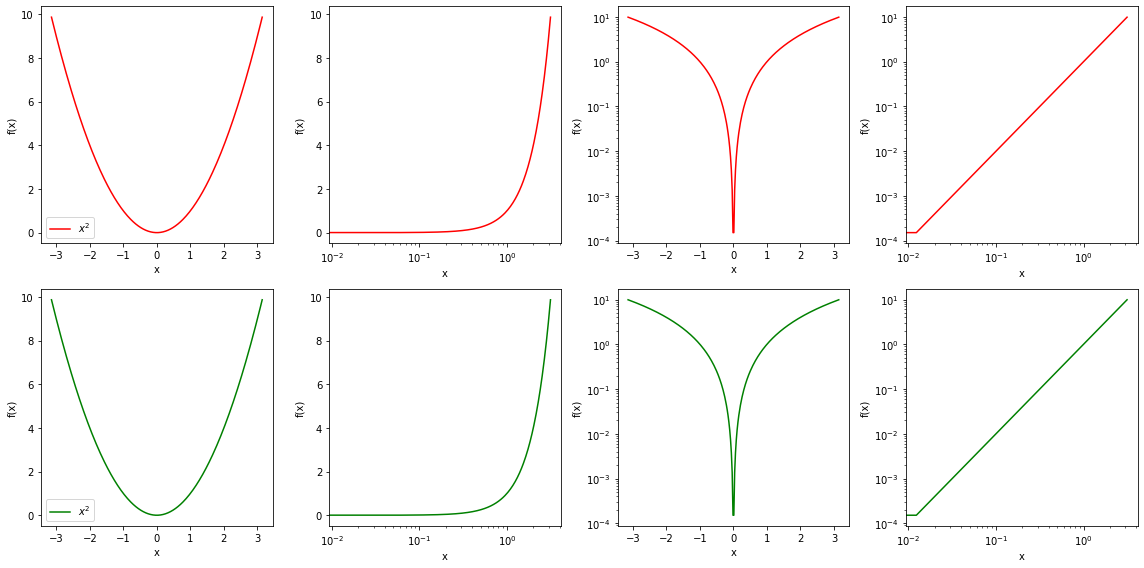

In [68]:
fig, axes = plt.subplots(2,4, figsize=(16,8))

axes[0,0].plot(x, x*x, 'r', label=r"$x^2$")
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('f(x)')
axes[0,0].legend(loc=0)

axes[0,1].semilogx(x, x*x, 'r', label="cos")
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('f(x)')

axes[0,2].semilogy(x, x*x, 'r', label="cos")
axes[0,2].set_xlabel('x')
axes[0,2].set_ylabel('f(x)')

axes[0,3].loglog(x, x*x, 'r', label="cos")
axes[0,3].set_xlabel('x')
axes[0,3].set_ylabel('f(x)')

axes[1,0].plot(x, x*x, 'g', label=r"$x^2$")
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('f(x)')
axes[1,0].legend(loc=0)

axes[1,1].plot(x, x*x, 'g', label="cos")
axes[1,1].set_xscale('log')
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('f(x)')

axes[1,2].plot(x, x*x, 'g', label="cos")
axes[1,2].set_yscale('log')
axes[1,2].set_xlabel('x')
axes[1,2].set_ylabel('f(x)')

axes[1,3].plot(x, x*x, 'g', label="cos")
axes[1,3].set_xscale('log')
axes[1,3].set_yscale('log')
axes[1,3].set_xlabel('x')
axes[1,3].set_ylabel('f(x)')

fig.tight_layout()

### Scientific notation

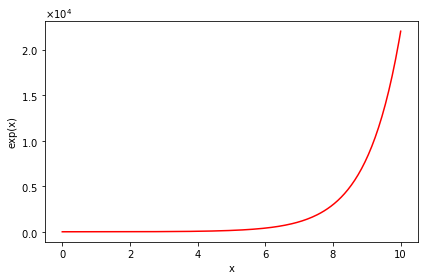

In [75]:
from matplotlib import ticker

x = np.linspace(0, 10, 200)
y = np.exp(x)

fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('exp(x)')

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.yaxis.set_major_formatter(formatter) 

fig.tight_layout()

## Plotting datasets using pandas

In [83]:
import pandas as pd
df = pd.read_csv("gapminder.csv")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [85]:
df['country'].unique() # Display unique entries in row 'country'

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [86]:
df.head(10) # display first 10 entries

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


Looking at the head of the dataframe tells us that we have information on life expectancies, population, and GDP for each country every 5 years. This should allow us to produce some interesting plots!

The plot function provided in pandas is just a simple wrapper around 'plt.plot':

<Figure size 432x288 with 0 Axes>

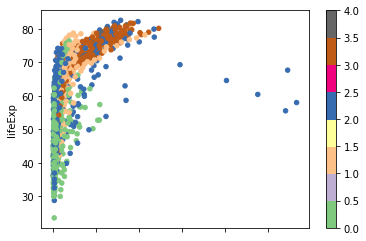

In [195]:
gdp = df.loc[:, ['continent', 'lifeExp', 'gdpPercap']]
gdp.loc[:, 'continent'] = pd.Categorical(gdp['continent'])

fig = plt.figure()
axes = gdp.plot.scatter(x='gdpPercap', y='lifeExp', c=gdp['continent'].cat.codes, cmap='Accent')

fig.tight_layout()

The interface for Matplotlib via Pandas is quite basic and does not, for example, allow us to get an instance of the colorbar to fix it. So we are actually better off using native Matplotlib and extracting data from the dataframes "manually"

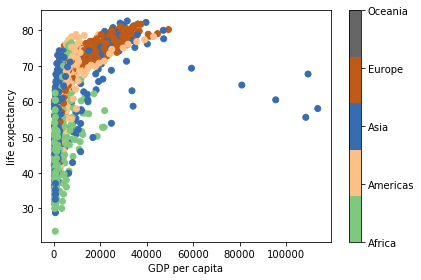

In [210]:
colours = gdp['continent'].cat.codes
colours_unique = colours.unique()
cm = plt.cm.get_cmap('Accent', len(colours_unique))
fig, axes = plt.subplots()

scatter = axes.scatter(gdp['gdpPercap'], gdp['lifeExp'], c=colours, cmap=cm)

# Format colour bar
cbar = fig.colorbar(scatter, ax=axes)
cbar.ax.get_yaxis().set_ticks(colours_unique)
cbar.ax.set_yticklabels(gdp['continent'].unique())

axes.set_xlabel('GDP per capita')
axes.set_ylabel('life expectancy')

fig.tight_layout()